[('like', 1228), ('feel', 1005), ('get', 817), ('bipolar', 729), ('time', 683), ('know', 660), ('day', 660), ('thing', 562), ('really', 556), ('want', 478), ('people', 472), ('one', 471), ('year', 458), ('life', 448), ('would', 421), ('episode', 421), ('think', 410), ('even', 408), ('manic', 398), ('going', 391)]
ed apparent reason unable stop didnt want kid see like night used suicide text
omething personally believed episode want get specific thinking take say music
 tell anything experience le anxiety want sleeping rest week turn something ub
ad person making difficult get shift want go home curl ball bed dog house goin
d inpatient treatment either decided want rehabilitate home want rest recenter
ither decided want rehabilitate home want rest recenter figure plan getting sh
 get girlfriend popular typical teen want based grew soon realized mental illn
 found hard relationship people girl want deal crazy constant mood swing made 
rable wake angry sad depressed go dr want medicated k

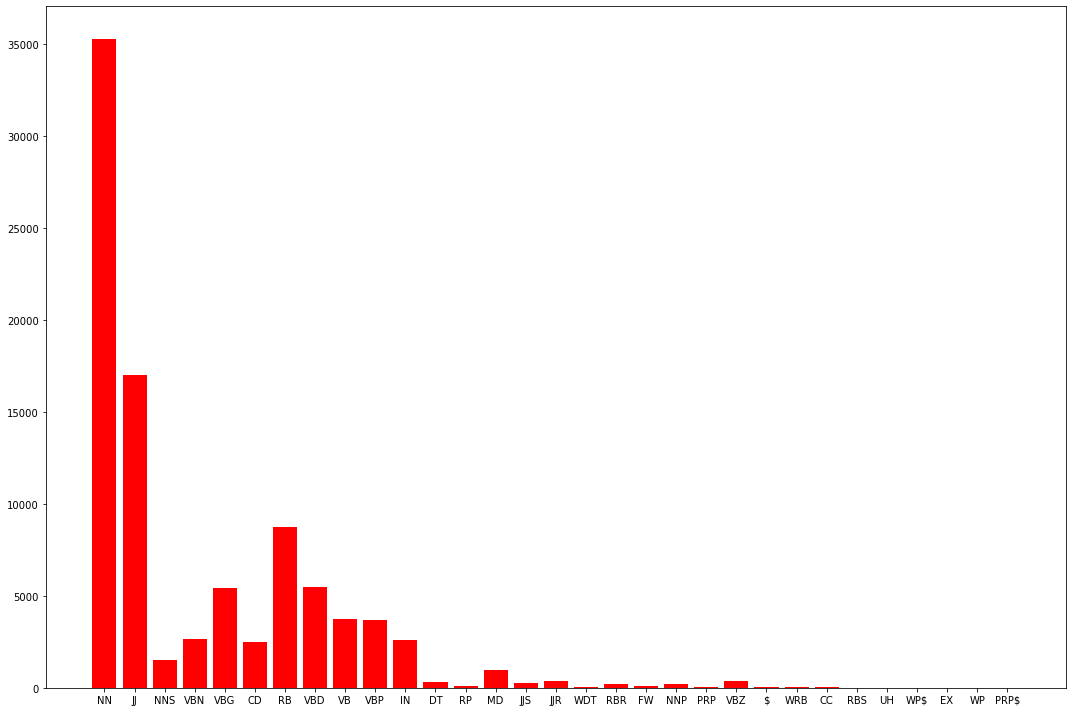

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist


df = pd.read_csv('r-bipolar data.csv')

df.fillna(value='')

tokenizer = RegexpTokenizer(r'\w+')
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_body = []
for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))
    

df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['nan', 'http', 'com', 'www', 'jpg', 'width', '1600', 'format', 'pjpg', '_', 'reddit']

            
def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['body'] = df['body'].apply(lambda x: exclude(x))    

for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            

            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
    

                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


df_new = pd.DataFrame({'text': df['body'],
                       'label': 4})



df_new.to_csv('r-bipolar data cleaned.csv', index=False)

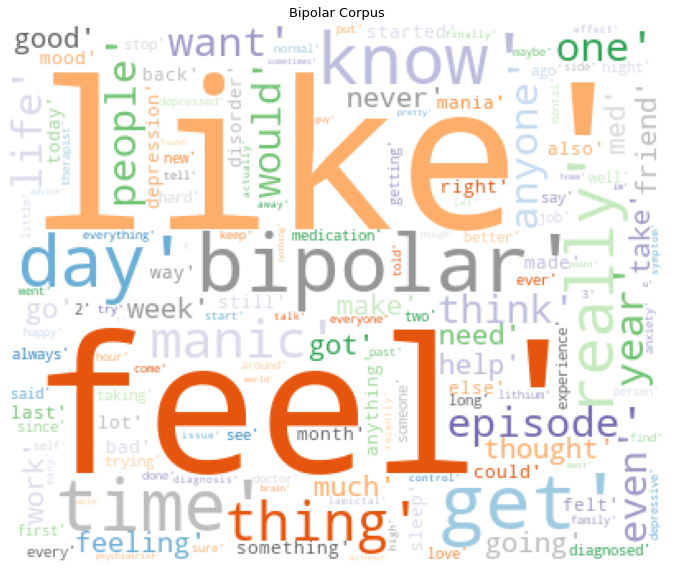

In [3]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'Bipolar Corpus')

In [6]:
df_new.head()

,text,label
0,"[deal, poor, impulse, control]",4
1,"[started, taking, lithium, 2, year, ago, chang...",4
2,[],4
3,"[sure, start, pick, right, feel, like, letting...",4
4,"[shitload, uni, assignment, get, lighter, mid,...",4


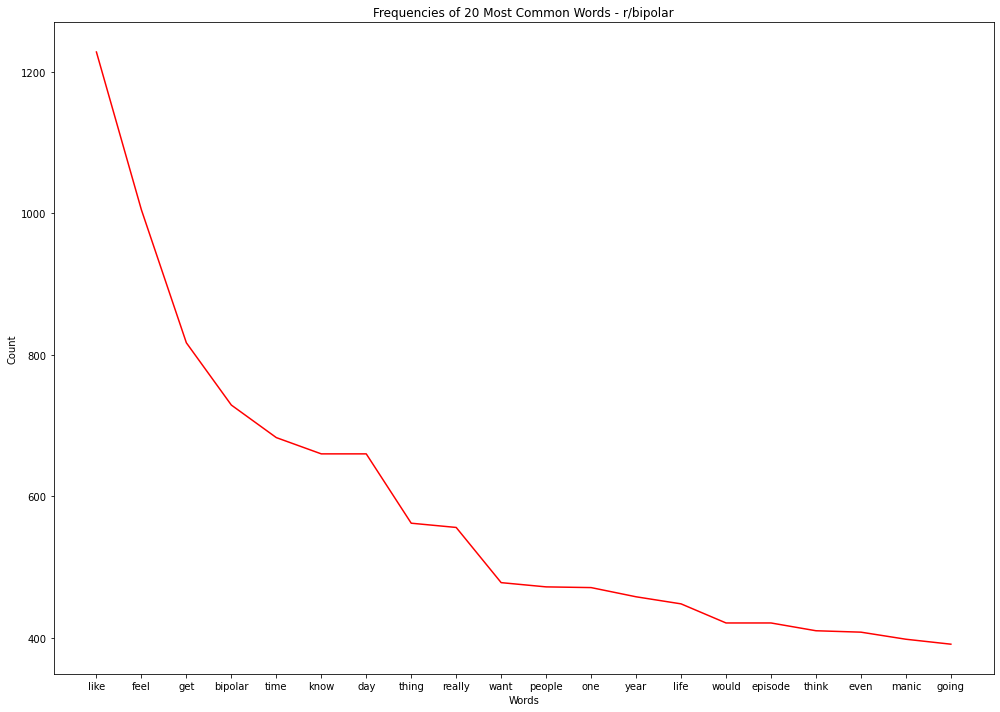

<Figure size 432x288 with 0 Axes>

In [8]:
top_20 = []
w_freq = fd.most_common(20)

freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='red')
plt.title("Frequencies of 20 Most Common Words - r/bipolar")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig("subreddit.png", dpi=300)